### Simple Perceptron in OOP form

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from sklearn import preprocessing


In [2]:
class Perceptron:
    def __init__(self,eta = 0.1, epochs = 10, random_seed=3):
        self.eta = eta
        self.epochs = epochs
        self.random_seed = random_seed
    def fit(self, X, y ,X0= False):
        if X0 == False:
            X = np.c_[np.ones(len(y)), X]
        np.random.seed(self.random_seed)
        self.w = np.random.random(X.shape[1])
        
        self.maxy,self.miny = y.max(),y.min()
        self.cost_=[] #인스턴스 변수로 사용하려면 self.을 붙여야 한다. 변수를 리스트로 초기화.
        self.w_=np.array([self.w]) #self.w_는 변화된 w를 또 하나의 벡터로 변환해서 w의 변화를 보는 것.
        
        for i in range(self.epochs):
            self.errors = 0
            for xi,yi in zip(X,y):
                yhat = self.activate(xi)
                delta = self.eta*(yi-yhat)*xi
                self.w = self.w +delta
                if yi!=yhat:
                    self.errors += 1
            self.cost_.append(self.errors)
            self.w_ = np.vstack([self.w_,self.w]) #w_에 w 추가.
        return self.errors
    
    def net_input(self,X):
        if X.shape[0] == self.w.shape[0]: #편향값이 1이 아닌 경우를 검사하기 위해
            z = np.dot(self.w.T, X)
        else:
            z = np.dot(X, self.w[1:])+self.w[0]
        return z
    
    def activate(self,X):
        mid = (self.maxy + self.miny)/2
        return np.where(self.net_input(X)>mid, self.maxy, self.miny)
    
    def predict(self,X):
        return self.activate(X) #이미 계산된 가중치로 새로운 입력 특성에 대해 예측하는 함수. 
                

In [3]:
class feature_detector:
    def read(self,url):
        with open(os.getcwd().replace('\\','/')+'/mushroom.txt') as mushroom:
            self.raw_data = np.array([i.split(',') for i in mushroom.read().split('\n')])
        return self.raw_data
    
    def Transform(self,column):
        le = preprocessing.LabelEncoder()
        set_col = list(set(column))
        le.fit(column)
        self.array = le.transform(column)
        set_array = le.transform(set_col)
        self.col_dict = dict(zip(set_col, set_array))
        return (self.array, self.col_dict)
    
    def concatenate(self):
        target, self.target_label = self.Transform(self.raw_data[:,0]) #target 
        self.target = target.reshape(self.raw_data.shape[0],1)
        self.feature_type = []

        col1, col1_dict = self.Transform(self.raw_data[:,1])
        self.data = np.array(col1).reshape(self.raw_data.shape[0],1)

        for n in range(2,self.raw_data.shape[1]):
            column = self.raw_data[:,n]
            array, dictionary = self.Transform(column)
            self.data = np.hstack([self.data,np.array(array).reshape(self.raw_data.shape[0],1)])
            self.feature_type.append(dictionary)
        
        return (self.data, self.target, self.feature_type, self.target_label)

The following class `feature_detector` is previous version for one-hot encoding. 

#### Data Pre-processing

In [4]:
import os 
from sklearn.model_selection import train_test_split
mushroom = feature_detector()
raw_data =mushroom.read(os.getcwd().replace('\\','/')+'/mushroom.txt')
X,y,x_label,y_label = mushroom.concatenate()
X_train, X_test, y_train, y_test = train_test_split(X,y)

### Training and Predict

Wall time: 3.78 s


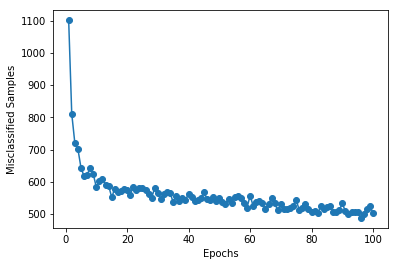

In [5]:
%%time
ppn = Perceptron(eta = 0.1, epochs=100)
ppn.fit(X_train,y_train)
plt.plot(range(1,len(ppn.cost_)+1),ppn.cost_,marker='o')
plt.xlabel('Epochs')
plt.ylabel('Misclassified Samples')
plt.savefig('Epochs',dpi = 150)

### Accuracy

In [6]:
np.mean(ppn.predict(X_test) == y_test)

0.5003569730719878

#### Accuracy is very small,,, using LabelEncoder() was not a good idea

### Then, use One-hot Encoding to transform feature name into number

In [7]:
class OneHotEncoding:
    def read(self,url):
        with open (url) as mushroom:
            self.raw_data = np.array([i.split(',') for i in mushroom.read().split('\n') if i!=''])
            return self.raw_data
    def encoding(self,raw_data):
        self.raw_data = raw_data
        attributes={}
        for i in range(0,self.raw_data.shape[1]):
            p=set()
            for j in self.raw_data:
                p.add(j[i])
            attributes[i]=p
        values = [list(i) for i in attributes.values()]
        total = []
        for data in self.raw_data:
            tag = np.array([])
            for i in range(0,len(values)):
                a = np.zeros(len(values[i]))
                b = a.copy()
                feature = data[i]
                b[values[i].index(feature)] = 1
                tag = np.r_[tag,b]
            total.append(tag)
        total = np.array(total)
        np.random.seed(1)
        np.random.shuffle(total)
        x = np.array([i[:-2] for i in total])
        y = np.array([i[-1] for i in total])
        return(x,y)


In [8]:
hot = OneHotEncoding()
raw_data = hot.read(os.getcwd().replace('\\','/')+'/mushroom.txt')
X,y = hot.encoding(raw_data)
X_train, X_test, y_train, y_test = train_test_split(X,y)

Wall time: 2.88 s


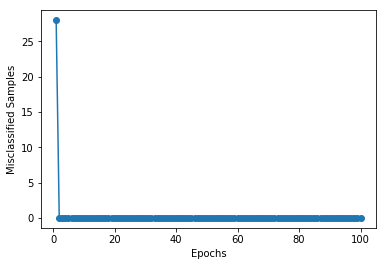

In [9]:
%%time
ppn = Perceptron(eta = 0.1, epochs=100)
ppn.fit(X_train,y_train)
plt.plot(range(1,len(ppn.cost_)+1),ppn.cost_,marker='o')
plt.xlabel('Epochs')
plt.ylabel('Misclassified Samples')
plt.savefig('Epochs',dpi = 150)

### Accuracy

In [10]:
np.mean(ppn.predict(X_test) == y_test)

1.0